# FUNCTIONS AND IMPORTS

In [128]:
import re, pickle
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sns
sns.color_palette()
sns.set_theme()

In [211]:
def get_type_line(l):

    info = dict()
    line = l.strip()
    if line.startswith("read"):
        sline = line.split()

        # Get IOS
        aux = sline[1].split("=")
        if "k" in aux[1]:
            IOS = float(aux[1].replace(",","").replace("k",""))
            IOS = IOS*1000
        else:
            IOS = float(aux[1].replace(",",""))
        info["IO"] = round(IOS,2)

        # Get BW
        aux = sline[2].split("=")
        BW = float(aux[1].replace("MiB/s",""))
        info["BW"] = BW

    if line.startswith("slat"):
        sline = line.split()

        aux = sline[4].split("=")
        SLAT = float(aux[1].replace(",",""))

        SLAT_unit = sline[1].replace("(","").replace(")","").replace(":","")
        if SLAT_unit == "nsec":
            info["slat"] = round(SLAT/1000,2)
            
        else:
            info["slat"] = SLAT

    if line.startswith("clat"):
        sline = line.split()

        case = -1
        if len(sline) == 6:
            case = 1
        elif len(sline) > 6:
            if len(sline[4]) > 4:
                case = 1
            else:
                case = 0

        if case == 1:
            aux = sline[4].split("=")
            CLAT = float(aux[1].replace(",",""))
            CLAT_unit = sline[1].replace("(","").replace(")","").replace(":","")

            if CLAT_unit == "nsec":
                info["clat"] = round(CLAT/1000,2)
            
            else:
                info["clat"] = CLAT

        elif case == 0:
                aux = sline[5]
                CLAT = float(aux.replace(",",""))
                CLAT_unit = sline[1].replace("(","").replace(")","").replace(":","")
                if CLAT_unit == "nsec":
                    info["clat"] = round(CLAT/1000,2)
                else:
                    info["clat"] = CLAT
                 

    if line.startswith("lat"):
        sline = line.split()
        if len(sline) == 6 and sline[2].startswith("min"):
            LAT_unit = sline[1].replace("(","").replace(")","").replace(":","")
            
            aux = sline[4].split("=")
            LAT = float(aux[1].replace(",",""))
            
            if LAT_unit == "nsec":
                info["lat"] = round(LAT/1000,2)
            
            else:
                info["lat"] = LAT
        elif len(sline) == 7 and sline[4].startswith("avg"):
            LAT_unit = sline[1].replace("(","").replace(")","").replace(":","")
            
            aux = sline[4].split("=")
            LAT = float(aux[1].replace(",",""))
            
            if LAT_unit == "nsec":
                info["lat"] = round(LAT/1000,2)
            else:
                info["lat"] = LAT


    return info



def get_plot_values_bs(all_info):
    plot_dict = dict()
    for k, v in all_info.items():
        x_ax = list(v.keys())
    
        y_ax = dict()
        for k1 in v.values():
            for k2, v2 in k1.items():
                if k2 not in y_ax:
                    y_ax[k2] = list()
                y_ax[k2].append(v2)

        for k3, v3 in y_ax.items():
            #print(k,v)
            y_ax[k3] = [x for _,x in sorted(zip(x_ax,v3))]
            
        x_ax_sorted = sorted(x_ax)
        
        plot_dict[k] = (x_ax_sorted, y_ax)
            
    return plot_dict


# MAIN

In [102]:
# PATHS
datapath = "data/fio/"

## GET x86 INFORMATION

In [222]:
# LOAD x86 DATA
x86path = datapath + 'logs-x86'
onlyfiles = [f for f in listdir(x86path) if isfile(join(x86path, f))]

x86_dict = dict()
for f in onlyfiles:
    with open(join(x86path, f)) as fx86:
        test = f.split("_")
        bs = test[1]
        size = test[2]

        if "MB" in size:
            size = float(size.replace("MB", ""))*1000
        else:
            size = float(size.replace("k",""))
        
        if bs not in x86_dict:
            x86_dict[bs] = dict()
            x86_dict[bs][size] = dict()
        else:
            if size not in x86_dict[bs]:
                x86_dict[bs][size] = dict()
                
        lines_x86 = fx86.readlines()
        for l in lines_x86:
            print(l)
            info = get_type_line(l)
            for k, v in info.items():
                x86_dict[bs][size][k] = v
            


fiotest_16k_2MB: (g=0): rw=randread, bs=(R) 16.0KiB-16.0KiB, (W) 16.0KiB-16.0KiB, (T) 16.0KiB-16.0KiB, ioengine=libaio, iodepth=1

...

fio-3.28

Starting 3 processes



fiotest_16k_2MB: (groupid=0, jobs=3): err= 0: pid=2756432: Thu Jan 11 12:56:00 2024

  read: IOPS=8930, BW=140MiB/s (146MB/s)(6144KiB/43msec)

    slat (usec): min=2, max=1637, avg=321.72, stdev=444.36

    clat (nsec): min=777, max=16361, avg=1434.76, stdev=1139.64

     lat (usec): min=3, max=1641, avg=323.53, stdev=445.48

    clat percentiles (nsec):

     |  1.00th=[  788],  5.00th=[  804], 10.00th=[  828], 20.00th=[  836],

     | 30.00th=[  844], 40.00th=[  860], 50.00th=[  884], 60.00th=[  932],

     | 70.00th=[ 1752], 80.00th=[ 2128], 90.00th=[ 2672], 95.00th=[ 2992],

     | 99.00th=[ 4384], 99.50th=[ 7648], 99.90th=[16320], 99.95th=[16320],

     | 99.99th=[16320]

  lat (nsec)   : 1000=63.28%

  lat (usec)   : 2=15.10%, 4=20.57%, 10=0.78%, 20=0.26%

  cpu          : usr=4.76%, sys=2.38%, ctx=148, majf=0, m

In [125]:
x86_dict

{'16k': {'2MB': {'IO': 8930.0,
   'BW': 140.0,
   'slat': 321.72,
   'clat': 1.43,
   'lat': 323.53},
  '8MB': {'IO': 12300.0,
   'BW': 192.0,
   'slat': 236.29,
   'clat': 1.36,
   'lat': 237.98},
  '1MB': {'IO': 8727.0,
   'BW': 136.0,
   'slat': 324.2,
   'clat': 1.68,
   'lat': 326.5},
  '256k': {'IO': 6000.0,
   'BW': 93.8,
   'slat': 440.33,
   'clat': 2.11,
   'lat': 442.93},
  '4MB': {'IO': 15400.0,
   'BW': 240.0,
   'slat': 186.48,
   'clat': 1.44,
   'lat': 188.26},
  '32k': {'IO': 2000.0,
   'BW': 31.2,
   'slat': 1271.6,
   'clat': 3.4,
   'lat': 1277.6},
  '128k': {'IO': 6000.0,
   'BW': 93.8,
   'slat': 461.55,
   'clat': 1.77,
   'lat': 463.86},
  '64k': {'IO': 3000.0,
   'BW': 46.9,
   'slat': 816.83,
   'clat': 2.8,
   'lat': 820.47},
  '512k': {'IO': 6857.0,
   'BW': 107.0,
   'slat': 396.03,
   'clat': 1.92,
   'lat': 398.53},
  '16MB': {'IO': 13700.0,
   'BW': 213.0,
   'slat': 212.3,
   'clat': 1.34,
   'lat': 213.95}},
 '4k': {'1MB': {'IO': 13200.0,
   'BW': 51.7

## GET RISCV INFORMATION

In [213]:
# LOAD RISCV DATA
riscvpath = datapath + 'logs-riscv'
onlyfiles = [f for f in listdir(x86path) if isfile(join(riscvpath, f))]

riscv_dict = dict()
for f in onlyfiles:
    with open(join(riscvpath, f)) as friscv:
        test = f.split("_")
        bs = test[1]
        size = test[2]
        
        if "MB" in size:
            size = float(size.replace("MB", ""))*1000
        else:
            size = float(size.replace("k",""))

        if bs not in riscv_dict:
            riscv_dict[bs] = dict()
            riscv_dict[bs][size] = dict()
        else:
            if size not in riscv_dict[bs]:
                riscv_dict[bs][size] = dict()
                
        lines_riscv = friscv.readlines()
        for l in lines_riscv:
            info = get_type_line(l)
            for k, v in info.items():
                riscv_dict[bs][size][k] = v
            


In [159]:
riscv_dict

{'16k': ([2000.0,
   8000.0,
   1000.0,
   256.0,
   4000.0,
   32.0,
   128.0,
   64.0,
   512.0,
   16000.0],
  {'IO': [19200.0,
    19000.0,
    19200.0,
    16000.0,
    19700.0,
    3000.0,
    12000.0,
    6000.0,
    19200.0,
    20200.0],
   'BW': [300.0, 296.0, 300.0, 250.0, 308.0, 46.9, 188.0, 93.8, 300.0, 316.0],
   'slat': [124.03,
    135.61,
    120.53,
    136.65,
    127.4,
    246.0,
    161.62,
    197.67,
    123.9,
    127.3],
   'clat': [6.84, 7.09, 6.71, 7.35, 6.68, 10.83, 7.79, 9.25, 6.82, 6.57],
   'lat': [130.87,
    142.7,
    127.24,
    144.0,
    134.08,
    256.83,
    169.42,
    206.92,
    130.72,
    133.87]}),
 '4k': ([1000.0,
   128.0,
   2000.0,
   8000.0,
   16000.0,
   512.0,
   64.0,
   32.0,
   4000.0,
   256.0],
  {'IO': [38400.0,
    32000.0,
    38400.0,
    37200.0,
    37100.0,
    38400.0,
    24000.0,
    12000.0,
    37900.0,
    32000.0],
   'BW': [150.0, 125.0, 150.0, 145.0, 145.0, 150.0, 93.8, 46.9, 148.0, 125.0],
   'slat': [60.65,
 

In [163]:
print(riscv_dict.keys())

dict_keys(['16k', '4k', '32k', '8k'])


In [204]:
plots_riscv = get_plot_values_bs(riscv_dict)


{'16k': ([32.0,
   64.0,
   128.0,
   256.0,
   512.0,
   1000.0,
   2000.0,
   4000.0,
   8000.0,
   16000.0],
  {'IO': [3000.0,
    6000.0,
    12000.0,
    16000.0,
    19200.0,
    19200.0,
    19200.0,
    19700.0,
    19000.0,
    20200.0],
   'BW': [46.9, 93.8, 188.0, 250.0, 300.0, 300.0, 300.0, 308.0, 296.0, 316.0],
   'slat': [246.0,
    197.67,
    161.62,
    136.65,
    123.9,
    120.53,
    124.03,
    127.4,
    135.61,
    127.3],
   'clat': [10.83, 9.25, 7.79, 7.35, 6.82, 6.71, 6.84, 6.68, 7.09, 6.57],
   'lat': [256.83,
    206.92,
    169.42,
    144.0,
    130.72,
    127.24,
    130.87,
    134.08,
    142.7,
    133.87]}),
 '4k': ([32.0,
   64.0,
   128.0,
   256.0,
   512.0,
   1000.0,
   2000.0,
   4000.0,
   8000.0,
   16000.0],
  {'IO': [12000.0,
    24000.0,
    32000.0,
    32000.0,
    38400.0,
    38400.0,
    38400.0,
    37900.0,
    37200.0,
    37100.0],
   'BW': [46.9, 93.8, 125.0, 125.0, 150.0, 150.0, 150.0, 148.0, 145.0, 145.0],
   'slat': [90.67,
 

## PLOTS

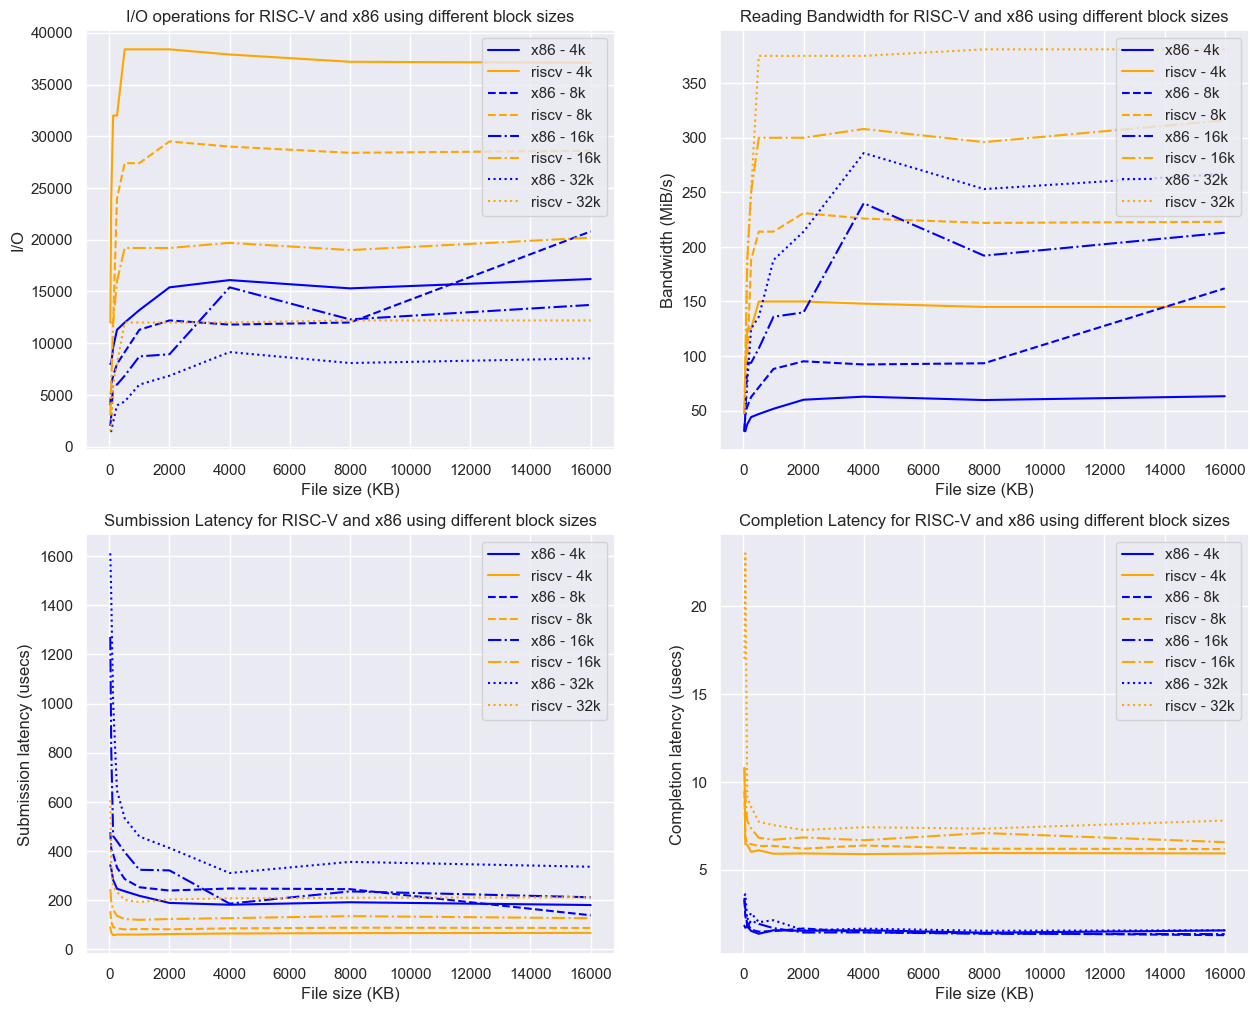

In [233]:
# BOX PLOT
plots_riscv = get_plot_values_bs(riscv_dict)
plots_x86 = get_plot_values_bs(x86_dict)

sorted_keys = ['4k', '8k', '16k', '32k']

linetype = ['-', '--', '-.', ':']

fig, ax = plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(12)

# IO
i = 0
j = 0
key = "IO"
ax[i][j].set_title("I/O operations for RISC-V and x86 using different block sizes")
n = 0
for k in sorted_keys:
    bp = ax[i][j].plot(plots_x86[k][0], plots_x86[k][1][key], linetype[n], label="x86 - " + k, c="blue")
    bp = ax[i][j].plot(plots_riscv[k][0], plots_riscv[k][1][key],linetype[n], label="riscv - " + k, c="orange")
    ax[i][j].legend(loc="upper right")
    ax[i][j].set_ylabel("I/O")
    ax[i][j].set_xlabel("File size (KB)")
    n+=1

    
# BW
i = 0
j = 1
key = "BW"
ax[i][j].set_title("Reading Bandwidth for RISC-V and x86 using different block sizes")
n = 0
for k in sorted_keys:
    bp = ax[i][j].plot(plots_x86[k][0], plots_x86[k][1][key], linetype[n], label="x86 - " + k, c="blue")
    bp = ax[i][j].plot(plots_riscv[k][0], plots_riscv[k][1][key],linetype[n], label="riscv - " + k, c="orange")
    ax[i][j].legend(loc="upper right")
    ax[i][j].set_ylabel("Bandwidth (MiB/s)")
    ax[i][j].set_xlabel("File size (KB)")
    n+=1


# slat
i = 1
j = 0
key = "slat"
ax[i][j].set_title("Sumbission Latency for RISC-V and x86 using different block sizes")
n = 0
for k in sorted_keys:
    bp = ax[i][j].plot(plots_x86[k][0], plots_x86[k][1][key], linetype[n], label="x86 - " + k, c="blue")
    bp = ax[i][j].plot(plots_riscv[k][0], plots_riscv[k][1][key],linetype[n], label="riscv - " + k, c="orange")
    ax[i][j].legend(loc="upper right")
    ax[i][j].set_ylabel("Submission latency (usecs)")
    ax[i][j].set_xlabel("File size (KB)")
    n+=1

# clat
i = 1
j = 1
key = "clat"
ax[i][j].set_title("Completion Latency for RISC-V and x86 using different block sizes")
n = 0
for k in sorted_keys:
    bp = ax[i][j].plot(plots_x86[k][0], plots_x86[k][1][key], linetype[n], label="x86 - " + k, c="blue")
    bp = ax[i][j].plot(plots_riscv[k][0], plots_riscv[k][1][key],linetype[n], label="riscv - " + k, c="orange")
    ax[i][j].legend(loc="upper right")
    ax[i][j].set_ylabel("Completion latency (usecs)")
    ax[i][j].set_xlabel("File size (KB)")
    n+=1

if False:
    # lat
    i = 2
    j = 0
    key = "lat"
    ax[i][j].set_title(key)
    n = 0
    for k in sorted_keys:
        bp = ax[i][j].plot(plots_x86[k][0], plots_x86[k][1][key], linetype[n], label="x86 - " + k, c="blue")
        bp = ax[i][j].plot(plots_riscv[k][0], plots_riscv[k][1][key],linetype[n], label="riscv - " + k, c="orange")
        ax[i][j].legend(loc="upper right")
        ax[i][j].set_ylabel("Total Latency (usecs)")
        ax[i][j].set_xlabel("File size (KB)")

        n+=1


plt.savefig('figures/fio_tests.png', bbox_inches='tight')

plt.show()

